# House Sales King County
Dataset : kc_house_data.csv

Predict house prices using Linear Regression

## Import required libraries


In [2]:
library(ggplot2)
library(corrplot)
library(dplyr)
library(gvlma)

Warning message:
“package ‘corrplot’ was built under R version 3.4.2”corrplot 0.84 loaded
Warning message:
“package ‘dplyr’ was built under R version 3.4.2”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Read Input file

In [3]:

data.file = read.csv(file="Datasets/kc_house_data.csv", 
                     header = T, 
                     sep = ","
)
head(data.file)
str(data.file)
summary(data.file)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,⋯,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,⋯,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,⋯,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


'data.frame':	21613 obs. of  21 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : Factor w/ 372 levels "20140502T000000",..: 165 221 291 221 284 11 57 252 340 306 ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 ...
 $ yr_renovat

       id                         date           price            bedrooms     
 Min.   :1.000e+06   20140623T000000:  142   Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.123e+09   20140625T000000:  131   1st Qu.: 321950   1st Qu.: 3.000  
 Median :3.905e+09   20140626T000000:  131   Median : 450000   Median : 3.000  
 Mean   :4.580e+09   20140708T000000:  127   Mean   : 540088   Mean   : 3.371  
 3rd Qu.:7.309e+09   20150427T000000:  126   3rd Qu.: 645000   3rd Qu.: 4.000  
 Max.   :9.900e+09   20150325T000000:  123   Max.   :7700000   Max.   :33.000  
                     (Other)        :20833                                     
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040   1st Qu.:1.000  
 Median :2.250   Median : 1910   Median :   7618   Median :1.500  
 Mean   :2.115   Mean   : 2080   Mean   :  15107   Mean   :1.494  
 3rd Qu.:2.500   3rd Qu.:

## Data Preprocessing

### Drop ID Column

In [4]:
data.file$id = NULL

### Get Year and Month from Date variable

In [5]:
data.file$year_sold = as.numeric(substr(data.file$date,1,4))
data.file$yearmonth_sold = as.numeric(substr(data.file$date,1,6))
data.file$date = NULL

In [6]:
unique(data.file$bathrooms)
unique(data.file$bedrooms)

[1] 1.00 2.25 3.00 2.00 4.50 1.50 2.50 1.75 2.75 3.25 4.00 3.50 0.75 4.75 5.00
[16] 4.25 3.75 0.00 1.25 5.25 6.00 0.50 5.50 6.75 5.75 8.00 7.50 7.75 6.25 6.50

[1]  3  2  4  5  1  6  7  0  8  9 11 10 33

### Converting required variables as factor

In [16]:
# colnames(data.file)
data.file$bedrooms = as.factor(data.file$bedrooms)
# data.file$bathrooms = as.factor(data.file$bathrooms)
data.file$floors = as.factor(data.file$floors)
data.file$waterfront = as.factor(data.file$waterfront)
data.file$view = as.factor(data.file$view)
data.file$condition = as.factor(data.file$condition)
data.file$grade = as.factor(data.file$grade)
#data.file$yr_renovated = as.factor(data.file$yr_renovated)
data.file$zipcode = as.factor(data.file$zipcode)
#data.file$zipcode = as.factor(data.file$zipcode)

In [17]:
str(data.file)

'data.frame':	21613 obs. of  22 variables:
 $ price         : num  221900 538000 180000 604000 510000 ...
 $ bedrooms      : Factor w/ 13 levels "0","1","2","3",..: 4 4 3 5 4 5 4 4 4 4 ...
 $ bathrooms     : num  4 9 4 12 8 18 9 6 4 10 ...
 $ sqft_living   : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot      : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors        : Factor w/ 6 levels "1","1.5","2",..: 1 3 1 1 1 1 3 1 1 3 ...
 $ waterfront    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ view          : Factor w/ 5 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ condition     : Factor w/ 5 levels "1","2","3","4",..: 3 3 3 5 3 3 3 3 3 3 ...
 $ grade         : Factor w/ 12 levels "1","3","4","5",..: 6 6 5 6 7 10 6 6 6 6 ...
 $ sqft_above    : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement : int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built      : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 

## Merging levels of bathrooms

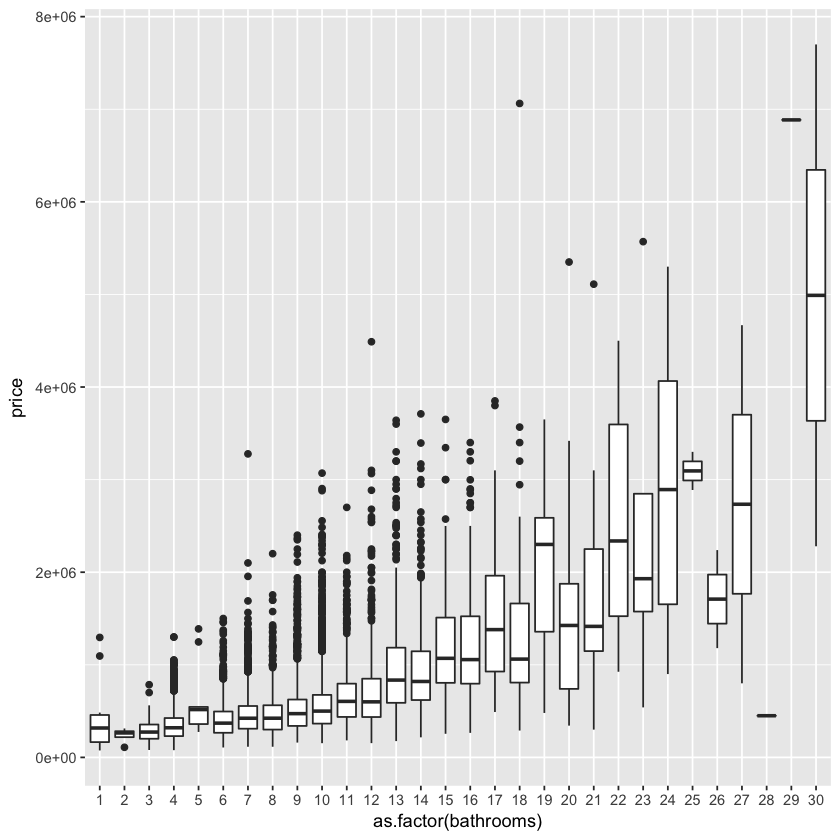

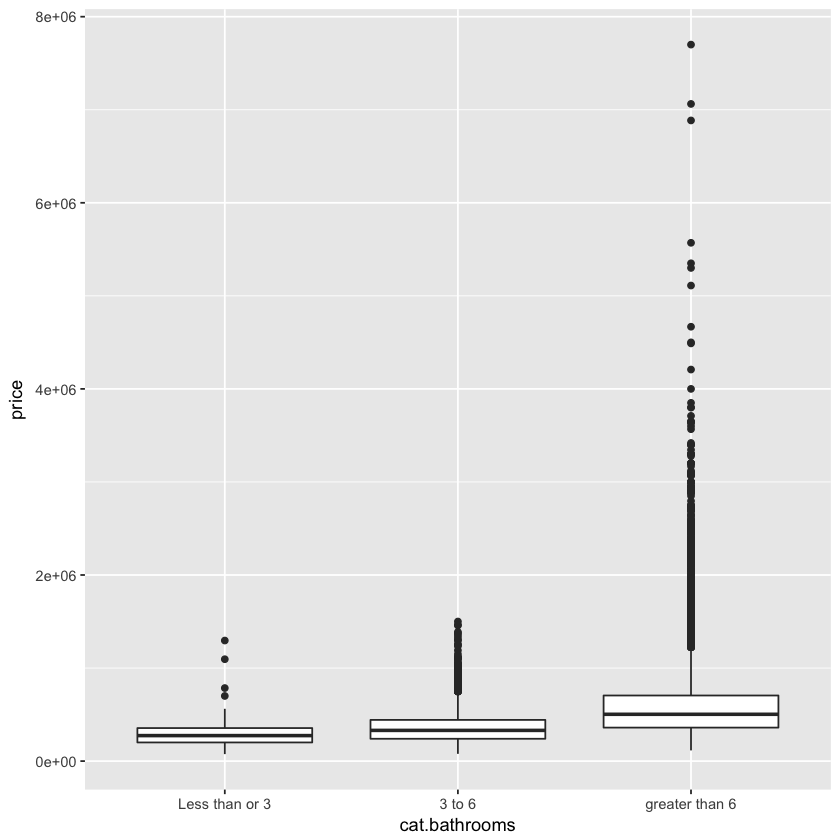

In [15]:
data.file$bathrooms = as.numeric(data.file$bathrooms)
ggplot(data.file,aes(as.factor(bathrooms),price))+geom_boxplot()
data.file$cat.bathrooms=cut(data.file$bathrooms, c(-1,3,6,Inf), c("Less than or 3","3 to 6","greater than 6"))
ggplot(data.file,aes(cat.bathrooms,price))+geom_boxplot()

## Test Train Split

In [18]:
set.seed(123)
sample = sample(1:nrow(data.file),size=0.7*nrow(data.file))
train.data.file = data.file[sample,]
test.data.file = data.file[-sample,]
nrow(data.file)
nrow(train.data.file)
nrow(test.data.file)

[1] 21613

[1] 15129

[1] 6484

## Data Transformation

Target variable normal distribution

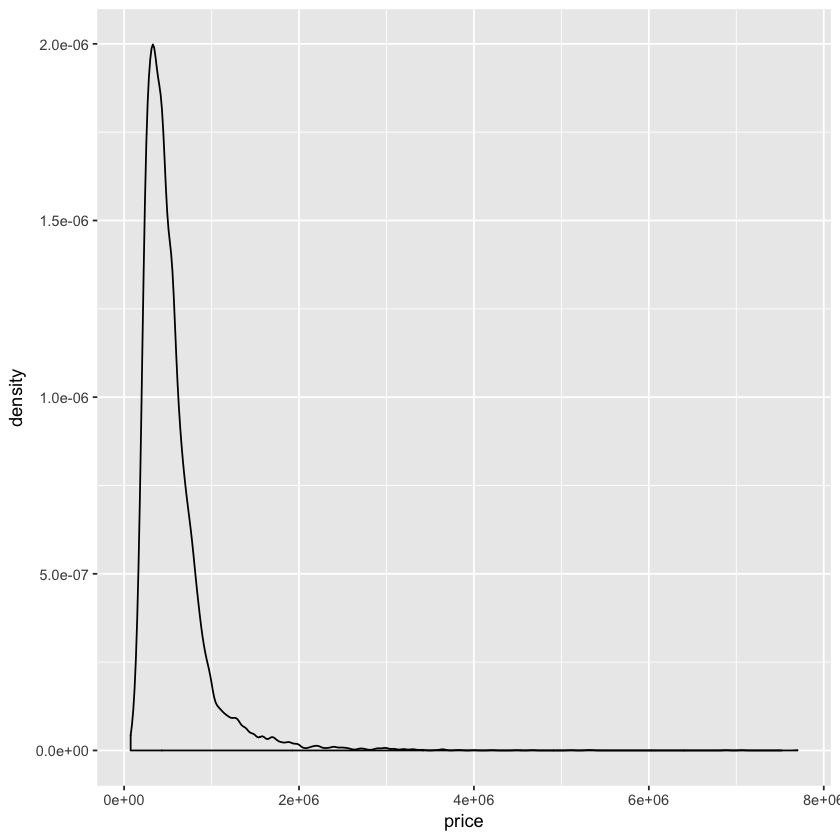

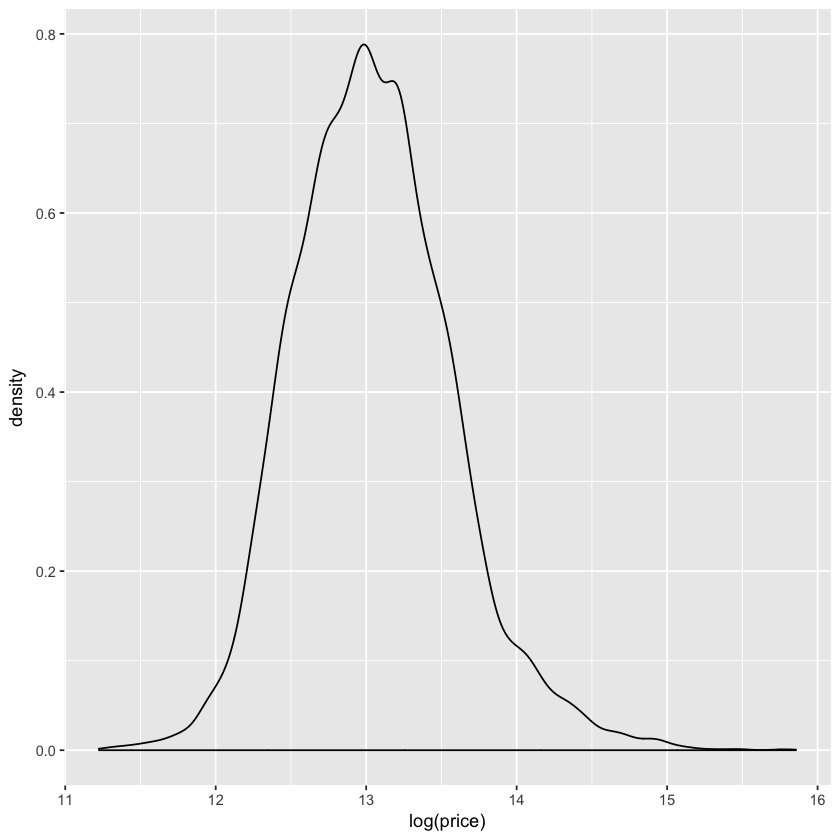

In [23]:
ggplot(train.data.file,aes(price))+geom_density()
ggplot(train.data.file,aes(log(price)))+geom_density()
train.data.file$price_log = log(train.data.file$price)

## Exploratory Data Analysis

### Cateogorical vs Target Variable

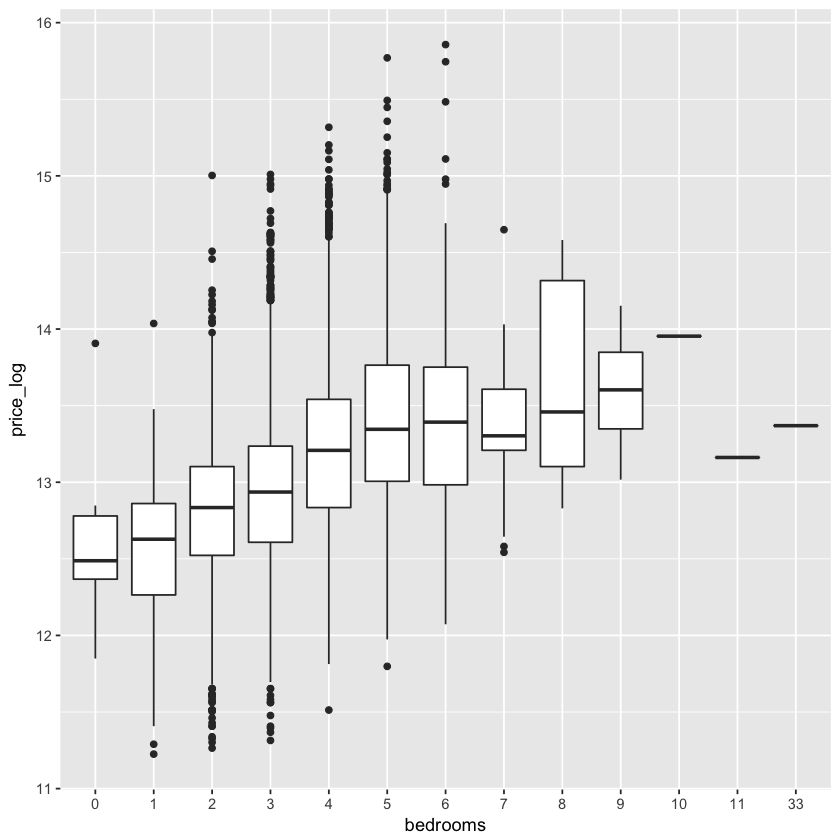

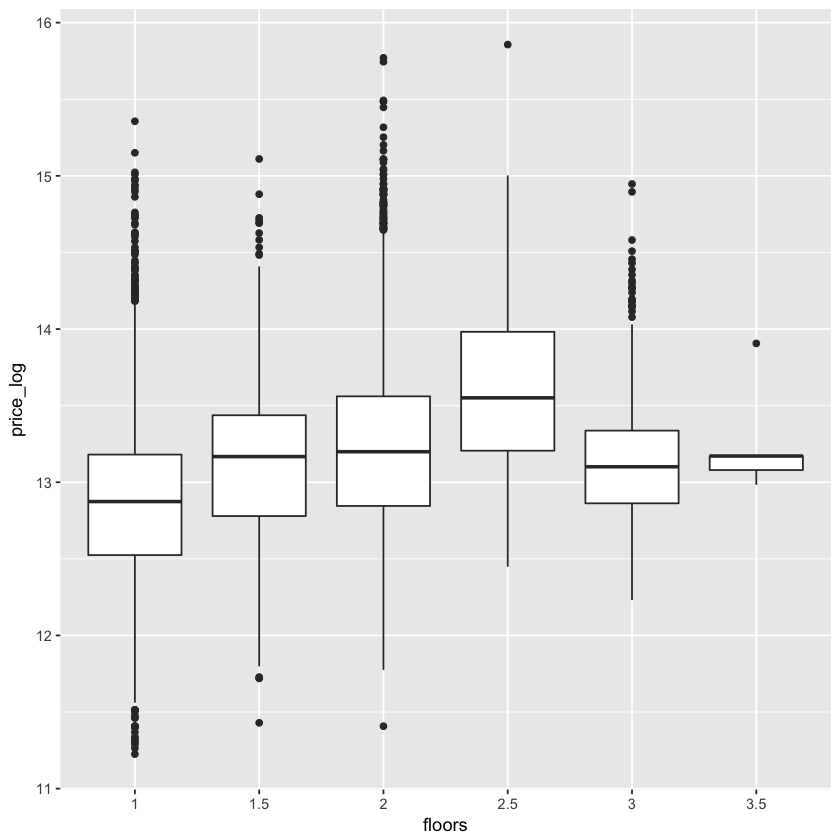

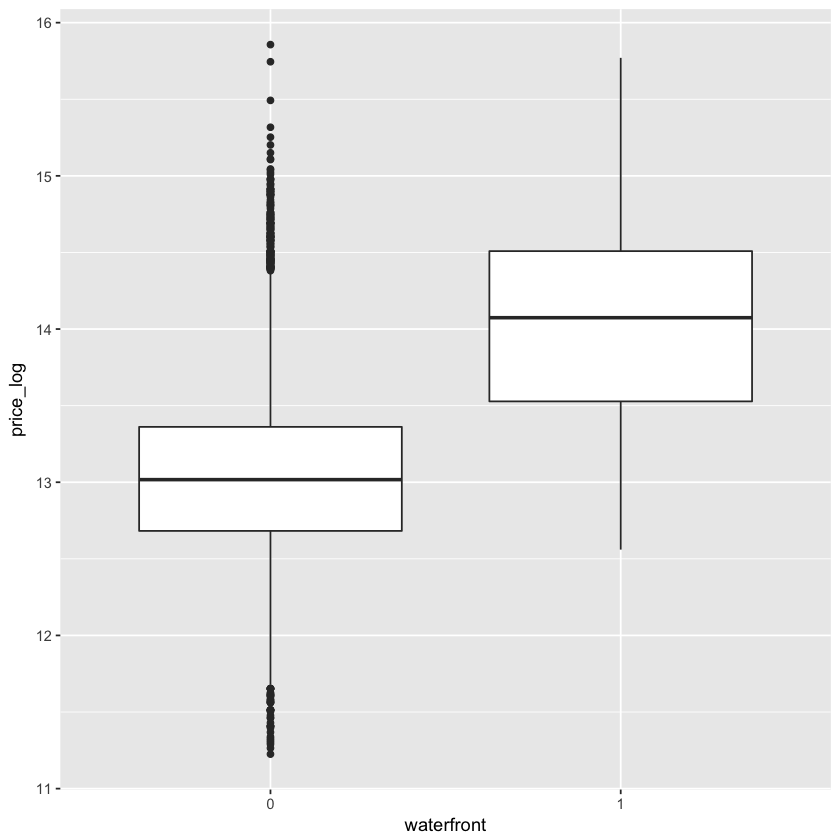

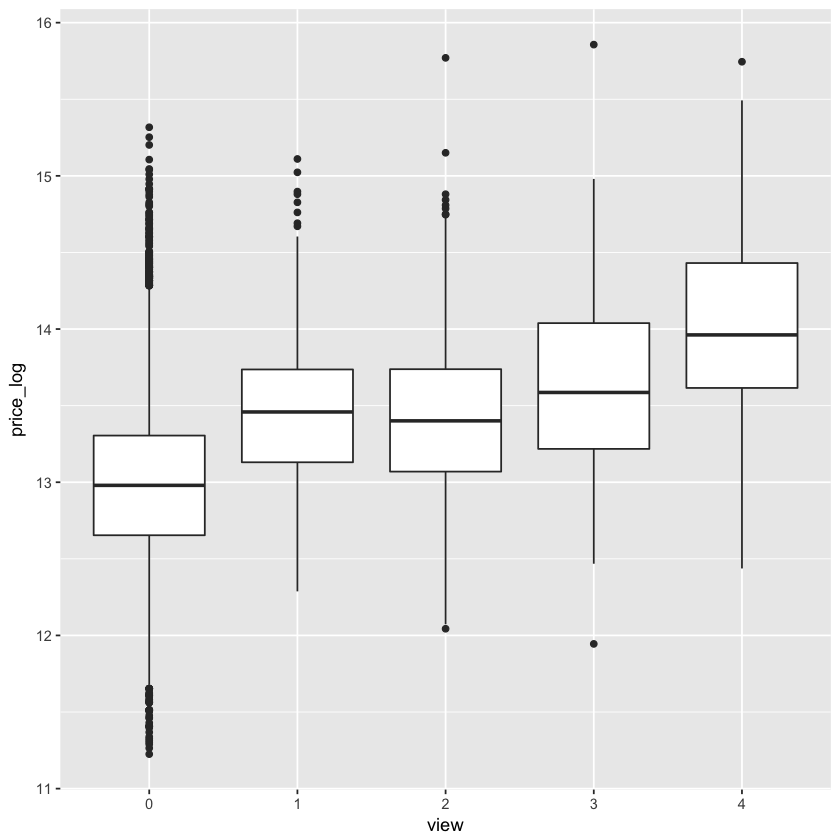

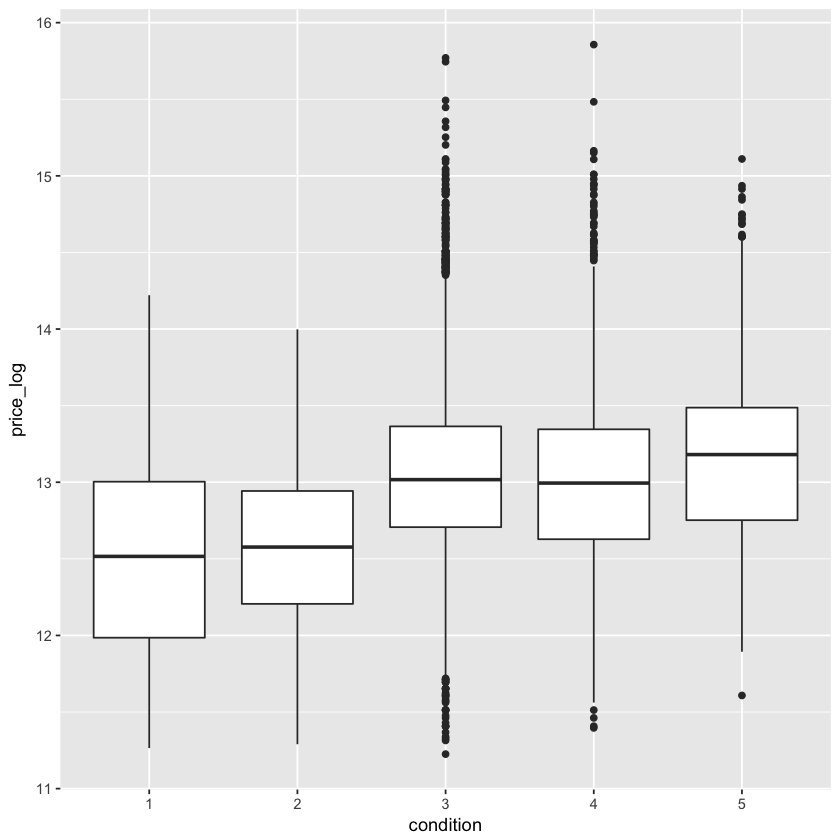

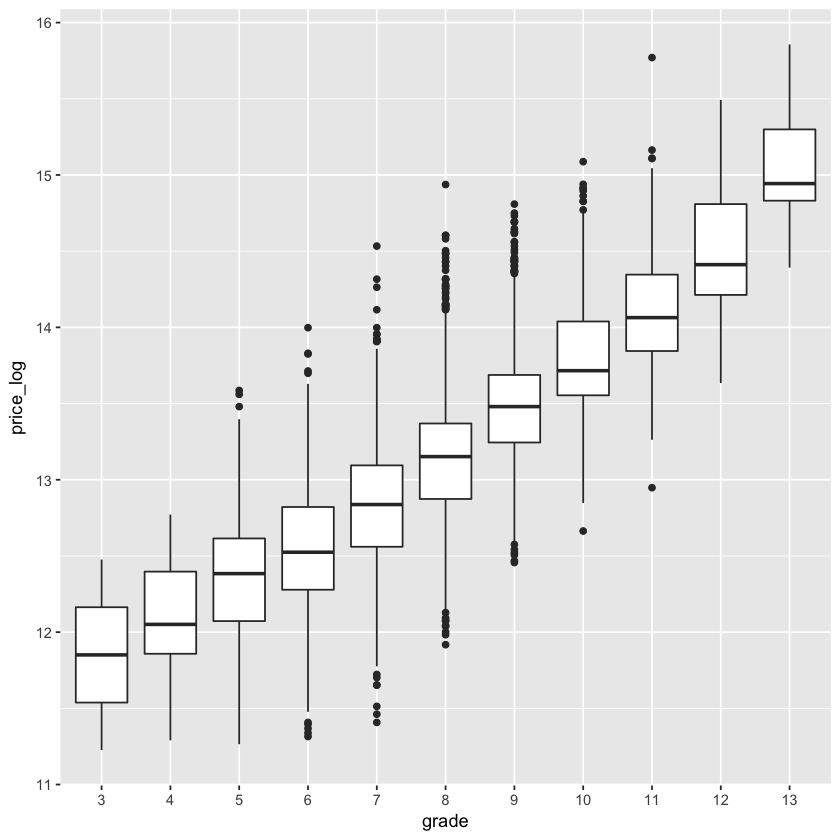

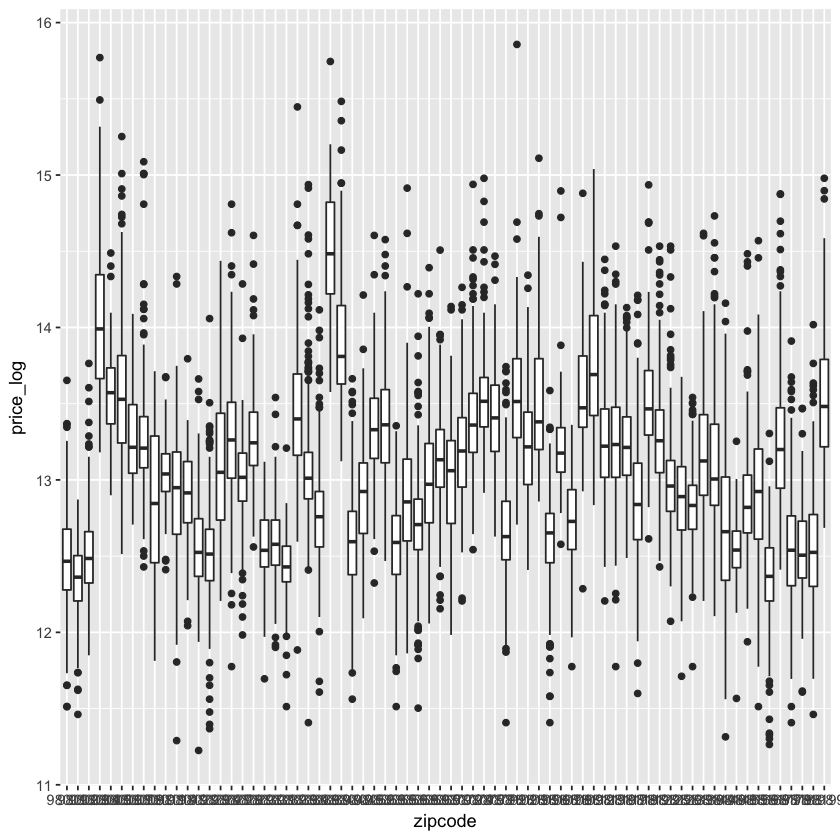

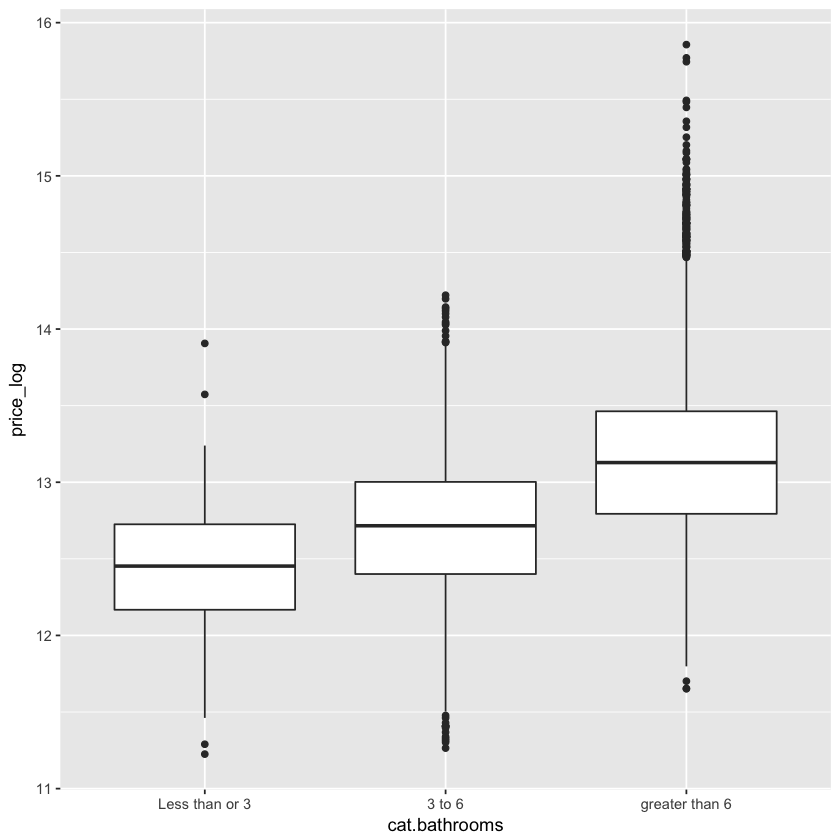

In [43]:
i = 1
tcols = ncol(train.data.file)
# colnames(train.data.file)[1]
for(i in 1:tcols){
    if(is.factor(train.data.file[,i])){
#         print("Yes")
#         print(colnames(train.data.file)[i])
        print(ggplot(train.data.file,aes_string(colnames(train.data.file)[i],"price_log"))+geom_boxplot())
    }
}

Continous vs Traget Variable

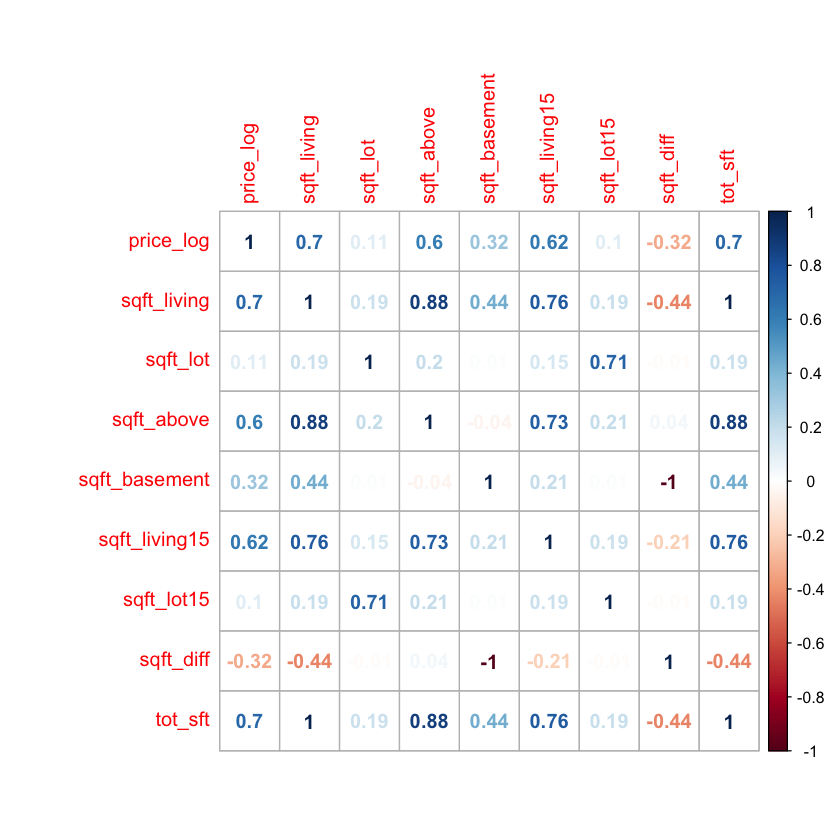

In [54]:
temp = train.data.file[,c('price_log','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15')]
temp$sqft_diff = temp$sqft_above-temp$sqft_living
temp$tot_sft = temp$sqft_living+temp$sqft_basement+temp$sqft_above
price.corplot = cor(temp)
corrplot(price.corplot, method="number")  
train.data.file$tot_sft = train.data.file$sqft_living+train.data.file$sqft_basement+train.data.file$sqft_above

## Linear Regression Model

In [57]:
# colnames(train.data.file)
lm1.train.data.file = train.data.file[,c("bedrooms","cat.bathrooms","tot_sft","floors","waterfront","view","condition","grade","price_log")]
lm1  = lm(price_log~.,data = lm1.train.data.file)
summary(lm1)
gvlma::gvlma(lm1)



Call:
lm(formula = price_log ~ ., data = lm1.train.data.file)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.32316 -0.23152  0.01189  0.22110  1.26202 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  1.142e+01  2.701e-01  42.278  < 2e-16 ***
bedrooms1                    1.621e-01  1.174e-01   1.381 0.167365    
bedrooms2                    1.701e-01  1.158e-01   1.468 0.142113    
bedrooms3                    5.124e-02  1.158e-01   0.443 0.658126    
bedrooms4                    3.990e-02  1.159e-01   0.344 0.730582    
bedrooms5                    5.931e-02  1.163e-01   0.510 0.609975    
bedrooms6                    3.543e-02  1.182e-01   0.300 0.764397    
bedrooms7                   -6.463e-02  1.348e-01  -0.479 0.631656    
bedrooms8                    2.292e-01  1.596e-01   1.436 0.150999    
bedrooms9                    2.319e-01  2.013e-01   1.152 0.249539    
bedrooms10                   5.805e-0


Call:
lm(formula = price_log ~ ., data = lm1.train.data.file)

Coefficients:
                (Intercept)                    bedrooms1  
                 11.4175463                    0.1620855  
                  bedrooms2                    bedrooms3  
                  0.1700634                    0.0512355  
                  bedrooms4                    bedrooms5  
                  0.0399028                    0.0593121  
                  bedrooms6                    bedrooms7  
                  0.0354298                   -0.0646254  
                  bedrooms8                    bedrooms9  
                  0.2292195                    0.2318505  
                 bedrooms10                   bedrooms11  
                  0.0580479                    0.1854947  
                 bedrooms33          cat.bathrooms3 to 6  
                  0.4752694                    0.0814187  
cat.bathroomsgreater than 6                      tot_sft  
                  0.0953478          

In [58]:
# colnames(train.data.file)
lm2.train.data.file = train.data.file[,c("bedrooms","bathrooms","tot_sft","floors","waterfront","view","condition","grade","price_log")]
lm2  = lm(price_log~.,data = lm2.train.data.file)
summary(lm2)
gvlma::gvlma(lm2)



Call:
lm(formula = price_log ~ ., data = lm2.train.data.file)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.34863 -0.23193  0.01237  0.22139  1.25474 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.139e+01  2.694e-01  42.303  < 2e-16 ***
bedrooms1    1.841e-01  1.154e-01   1.595 0.110721    
bedrooms2    2.017e-01  1.126e-01   1.791 0.073321 .  
bedrooms3    8.235e-02  1.126e-01   0.732 0.464447    
bedrooms4    7.036e-02  1.127e-01   0.624 0.532410    
bedrooms5    8.656e-02  1.132e-01   0.765 0.444306    
bedrooms6    5.824e-02  1.153e-01   0.505 0.613360    
bedrooms7   -5.089e-02  1.324e-01  -0.384 0.700766    
bedrooms8    2.427e-01  1.576e-01   1.540 0.123659    
bedrooms9    2.388e-01  1.999e-01   1.195 0.232196    
bedrooms10   4.398e-02  3.483e-01   0.126 0.899502    
bedrooms11   2.108e-01  3.474e-01   0.607 0.544010    
bedrooms33   5.110e-01  3.474e-01   1.471 0.141340    
bathrooms    4.861e-03  1.529e-03   3.179 0.0014


Call:
lm(formula = price_log ~ ., data = lm2.train.data.file)

Coefficients:
(Intercept)    bedrooms1    bedrooms2    bedrooms3    bedrooms4    bedrooms5  
 11.3946102    0.1841479    0.2017229    0.0823510    0.0703563    0.0865629  
  bedrooms6    bedrooms7    bedrooms8    bedrooms9   bedrooms10   bedrooms11  
  0.0582399   -0.0508937    0.2427004    0.2388388    0.0439839    0.2107838  
 bedrooms33    bathrooms      tot_sft    floors1.5      floors2    floors2.5  
  0.5109815    0.0048607    0.0001061    0.1767966   -0.0299771    0.1348329  
    floors3    floors3.5  waterfront1        view1        view2        view3  
  0.0896448    0.2059292    0.2929710    0.2470299    0.1422053    0.1760646  
      view4   condition2   condition3   condition4   condition5       grade4  
  0.3227277   -0.0466115    0.0385052    0.1049181    0.2332444    0.3103047  
     grade5       grade6       grade7       grade8       grade9      grade10  
  0.4524407    0.6178515    0.8524398    1.0546162   

In [59]:
# colnames(train.data.file)
lm3.train.data.file = train.data.file[,c("bedrooms","bathrooms","tot_sft","floors","waterfront","view","condition","grade","price_log")]
lm3.train.data.file$bathrooms = as.factor(lm3.train.data.file$bathrooms)
lm3  = lm(price_log~.,data = lm3.train.data.file)
summary(lm3)
gvlma::gvlma(lm3)



Call:
lm(formula = price_log ~ ., data = lm3.train.data.file)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.35923 -0.23207  0.01398  0.22025  1.26142 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.143e+01  2.690e-01  42.475  < 2e-16 ***
bedrooms1    4.829e-02  1.489e-01   0.324 0.745677    
bedrooms2    5.991e-02  1.481e-01   0.404 0.685914    
bedrooms3   -5.467e-02  1.481e-01  -0.369 0.712022    
bedrooms4   -6.475e-02  1.482e-01  -0.437 0.662086    
bedrooms5   -6.329e-02  1.485e-01  -0.426 0.669975    
bedrooms6   -9.578e-02  1.501e-01  -0.638 0.523408    
bedrooms7   -1.488e-01  1.642e-01  -0.906 0.364759    
bedrooms8    8.816e-02  1.851e-01   0.476 0.633841    
bedrooms9    2.208e-01  2.408e-01   0.917 0.359269    
bedrooms10  -1.061e-01  3.761e-01  -0.282 0.777773    
bedrooms11   2.983e-02  3.595e-01   0.083 0.933878    
bedrooms33   3.607e-01  3.593e-01   1.004 0.315449    
bathrooms2  -1.090e-01  2.563e-01  -0.425 0.6705


Call:
lm(formula = price_log ~ ., data = lm3.train.data.file)

Coefficients:
(Intercept)    bedrooms1    bedrooms2    bedrooms3    bedrooms4    bedrooms5  
 11.4272328    0.0482893    0.0599067   -0.0546655   -0.0647519   -0.0632894  
  bedrooms6    bedrooms7    bedrooms8    bedrooms9   bedrooms10   bedrooms11  
 -0.0957820   -0.1488351    0.0881603    0.2207805   -0.1061482    0.0298274  
 bedrooms33   bathrooms2   bathrooms3   bathrooms4   bathrooms5   bathrooms6  
  0.3606852   -0.1090367    0.2187550    0.2660955    0.3581016    0.2592171  
 bathrooms7   bathrooms8   bathrooms9  bathrooms10  bathrooms11  bathrooms12  
  0.2910806    0.2870344    0.2780478    0.2305991    0.2973684    0.3181057  
bathrooms13  bathrooms14  bathrooms15  bathrooms16  bathrooms17  bathrooms18  
  0.3383108    0.3167315    0.4403071    0.3658040    0.3257403    0.2849398  
bathrooms19  bathrooms20  bathrooms21  bathrooms22  bathrooms23  bathrooms24  
  0.4163707    0.3075074    0.3498515    0.3218674   

In [60]:
# colnames(train.data.file)
lm4.train.data.file = train.data.file[,c("bedrooms","tot_sft","floors","waterfront","view","condition","grade","price_log")]
lm4  = lm(price_log~.,data = lm4.train.data.file)
summary(lm4)
gvlma::gvlma(lm4)



Call:
lm(formula = price_log ~ ., data = lm4.train.data.file)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.32777 -0.23114  0.01224  0.22098  1.24730 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.138e+01  2.694e-01  42.240  < 2e-16 ***
bedrooms1    2.017e-01  1.154e-01   1.749 0.080381 .  
bedrooms2    2.201e-01  1.125e-01   1.957 0.050424 .  
bedrooms3    1.047e-01  1.124e-01   0.932 0.351310    
bedrooms4    9.392e-02  1.125e-01   0.835 0.403747    
bedrooms5    1.127e-01  1.129e-01   0.999 0.318017    
bedrooms6    8.869e-02  1.149e-01   0.772 0.440149    
bedrooms7   -1.353e-02  1.320e-01  -0.103 0.918347    
bedrooms8    2.815e-01  1.572e-01   1.791 0.073380 .  
bedrooms9    2.846e-01  1.994e-01   1.427 0.153554    
bedrooms10   1.094e-01  3.478e-01   0.315 0.753094    
bedrooms11   2.391e-01  3.474e-01   0.688 0.491238    
bedrooms33   5.328e-01  3.474e-01   1.534 0.125171    
tot_sft      1.103e-04  2.837e-06  38.871  < 2e-


Call:
lm(formula = price_log ~ ., data = lm4.train.data.file)

Coefficients:
(Intercept)    bedrooms1    bedrooms2    bedrooms3    bedrooms4    bedrooms5  
 11.3792313    0.2017041    0.2201438    0.1047490    0.0939159    0.1127329  
  bedrooms6    bedrooms7    bedrooms8    bedrooms9   bedrooms10   bedrooms11  
  0.0886949   -0.0135273    0.2814884    0.2846393    0.1093961    0.2391182  
 bedrooms33      tot_sft    floors1.5      floors2    floors2.5      floors3  
  0.5327895    0.0001103    0.1749389   -0.0227618    0.1400353    0.1014978  
  floors3.5  waterfront1        view1        view2        view3        view4  
  0.2188229    0.2936050    0.2470407    0.1422588    0.1767035    0.3229475  
 condition2   condition3   condition4   condition5       grade4       grade5  
 -0.0463126    0.0407551    0.1057321    0.2362895    0.3203923    0.4595069  
     grade6       grade7       grade8       grade9      grade10      grade11  
  0.6250331    0.8636584    1.0684870    1.2696688   

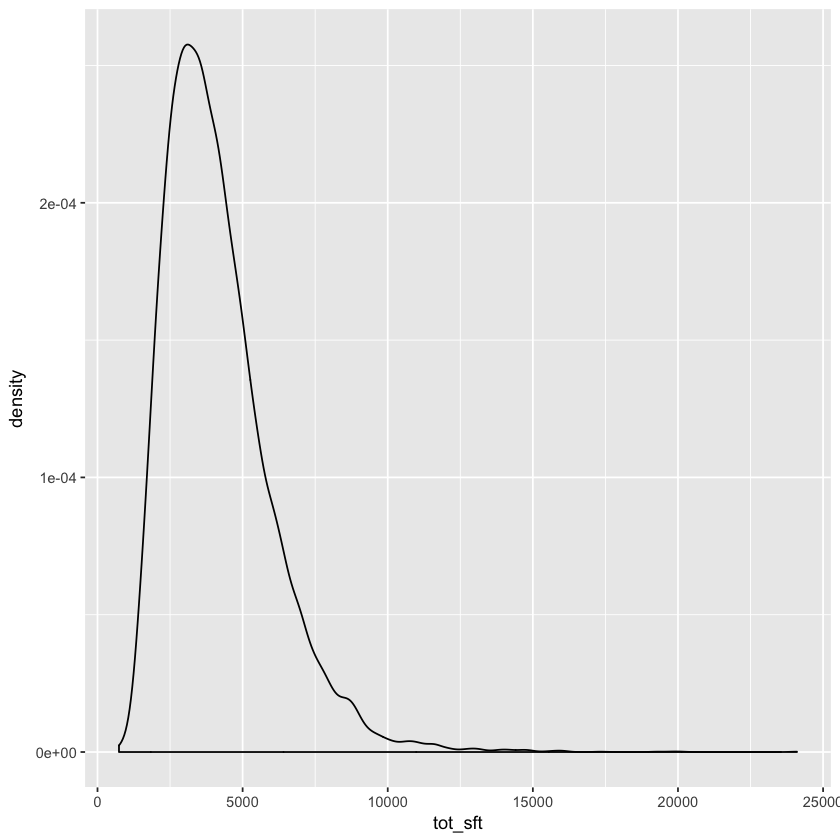


Call:
lm(formula = price_log ~ ., data = lm5.train.data.file)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2982 -0.2297  0.0120  0.2206  1.2395 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.256596   0.286819  28.787  < 2e-16 ***
bedrooms1    0.066224   0.148830   0.445 0.656353    
bedrooms2    0.025307   0.148066   0.171 0.864293    
bedrooms3   -0.119176   0.148035  -0.805 0.420804    
bedrooms4   -0.133719   0.148137  -0.903 0.366714    
bedrooms5   -0.119903   0.148487  -0.807 0.419392    
bedrooms6   -0.147182   0.150094  -0.981 0.326805    
bedrooms7   -0.222290   0.164217  -1.354 0.175872    
bedrooms8    0.037090   0.185056   0.200 0.841150    
bedrooms9    0.169622   0.240764   0.705 0.481124    
bedrooms10  -0.167703   0.375981  -0.446 0.655574    
bedrooms11  -0.030162   0.359396  -0.084 0.933117    
bedrooms33   0.292519   0.359150   0.814 0.415386    
bathrooms2  -0.052566   0.256209  -0.205 0.837444    
bathrooms3   0.287


Call:
lm(formula = price_log ~ ., data = lm5.train.data.file)

Coefficients:
(Intercept)    bedrooms1    bedrooms2    bedrooms3    bedrooms4    bedrooms5  
   8.256596     0.066224     0.025307    -0.119176    -0.133719    -0.119903  
  bedrooms6    bedrooms7    bedrooms8    bedrooms9   bedrooms10   bedrooms11  
  -0.147182    -0.222290     0.037090     0.169622    -0.167703    -0.030162  
 bedrooms33   bathrooms2   bathrooms3   bathrooms4   bathrooms5   bathrooms6  
   0.292519    -0.052566     0.287606     0.316471     0.338498     0.281279  
 bathrooms7   bathrooms8   bathrooms9  bathrooms10  bathrooms11  bathrooms12  
   0.299952     0.295905     0.283766     0.234271     0.307459     0.332756  
bathrooms13  bathrooms14  bathrooms15  bathrooms16  bathrooms17  bathrooms18  
   0.375686     0.354060     0.488557     0.438782     0.436459     0.387594  
bathrooms19  bathrooms20  bathrooms21  bathrooms22  bathrooms23  bathrooms24  
   0.607817     0.437795     0.498654     0.644847   

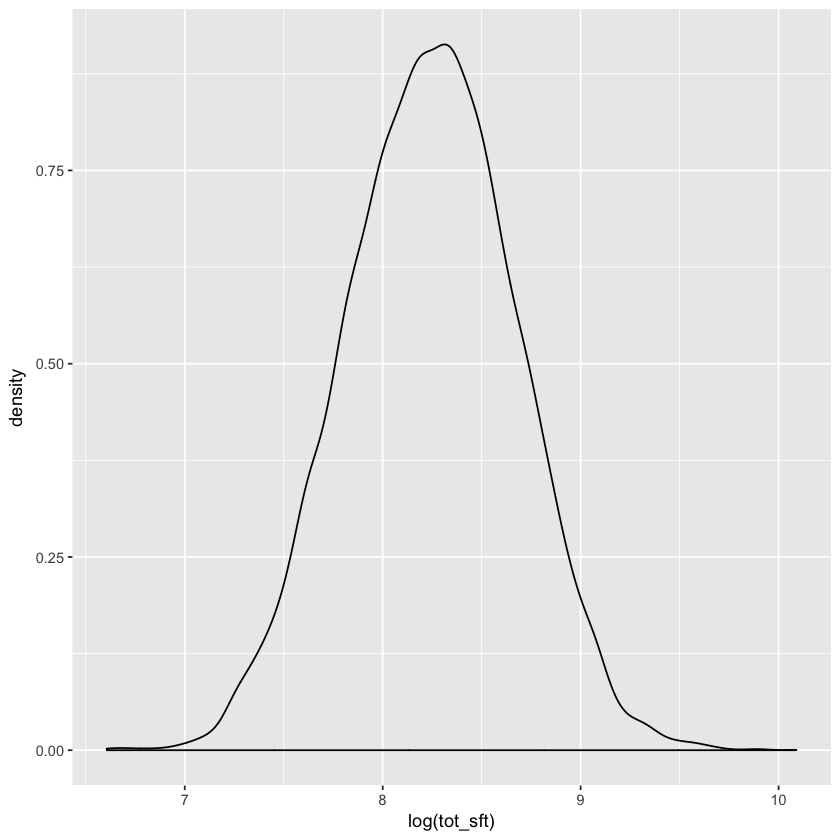

In [65]:
# colnames(train.data.file)
lm5.train.data.file = train.data.file[,c("bedrooms","bathrooms","tot_sft","floors","waterfront","view","condition","grade","price_log")]
ggplot(lm5.train.data.file,aes(tot_sft))+geom_density()
ggplot(lm5.train.data.file,aes(log(tot_sft)))+geom_density()
lm5.train.data.file$log.tot_sft = log(lm5.train.data.file$tot_sft)
lm5.train.data.file$tot_sft = NULL
lm5.train.data.file$bathrooms = as.factor(lm5.train.data.file$bathrooms)
lm5  = lm(price_log~.,data = lm5.train.data.file)
summary(lm5)
gvlma::gvlma(lm5)
# 

Warning message:
“not plotting observations with leverage one:
  5544, 6186, 10200, 14887”

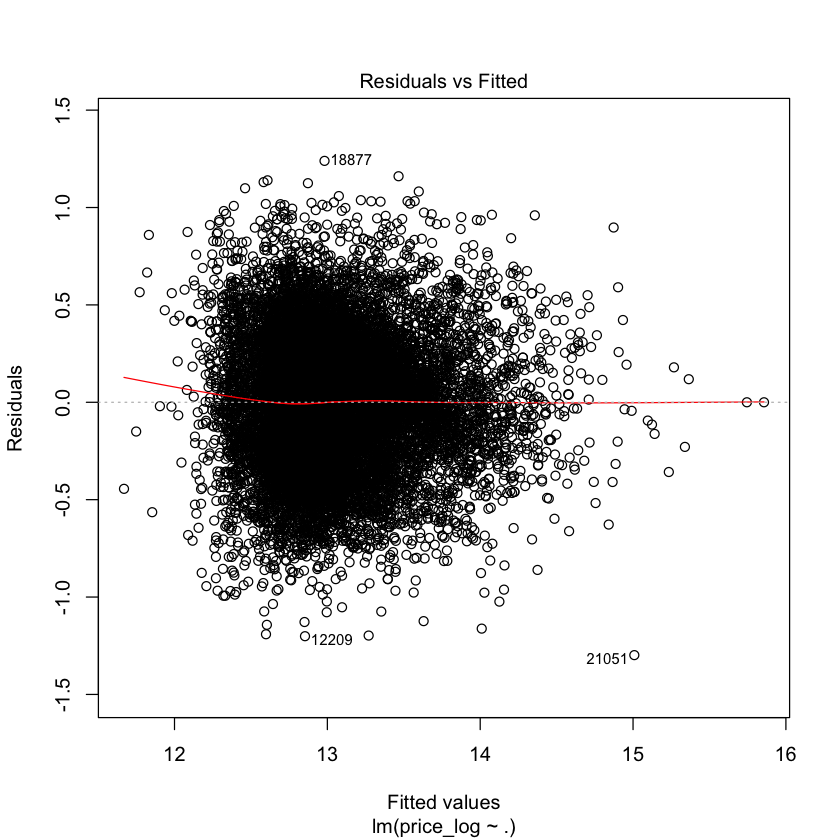

Warning message:
“not plotting observations with leverage one:
  5544, 6186, 10200, 14887”

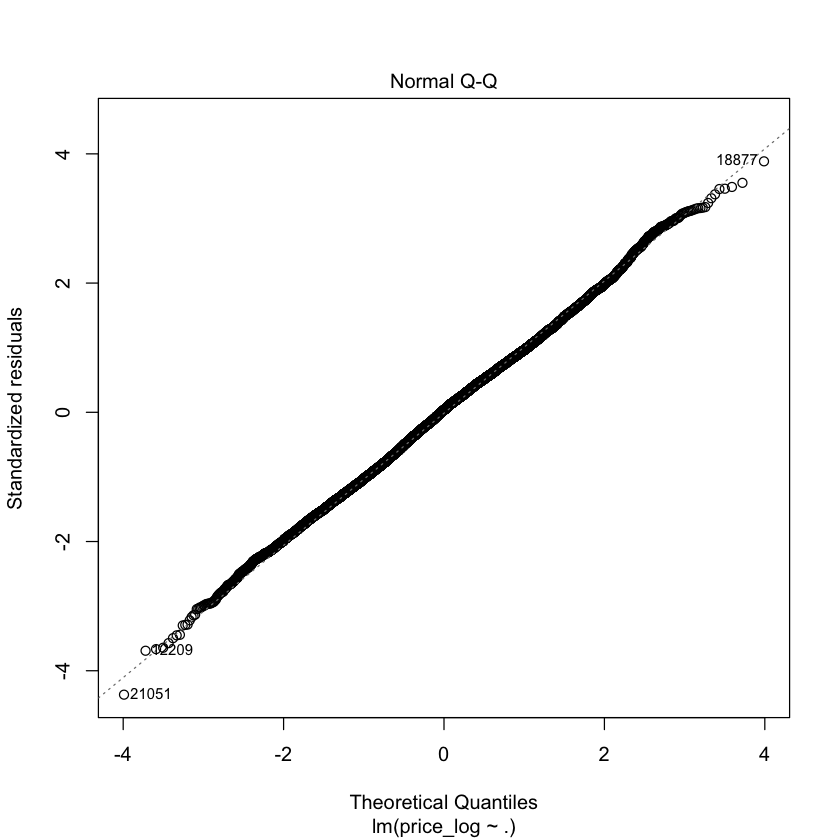

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”

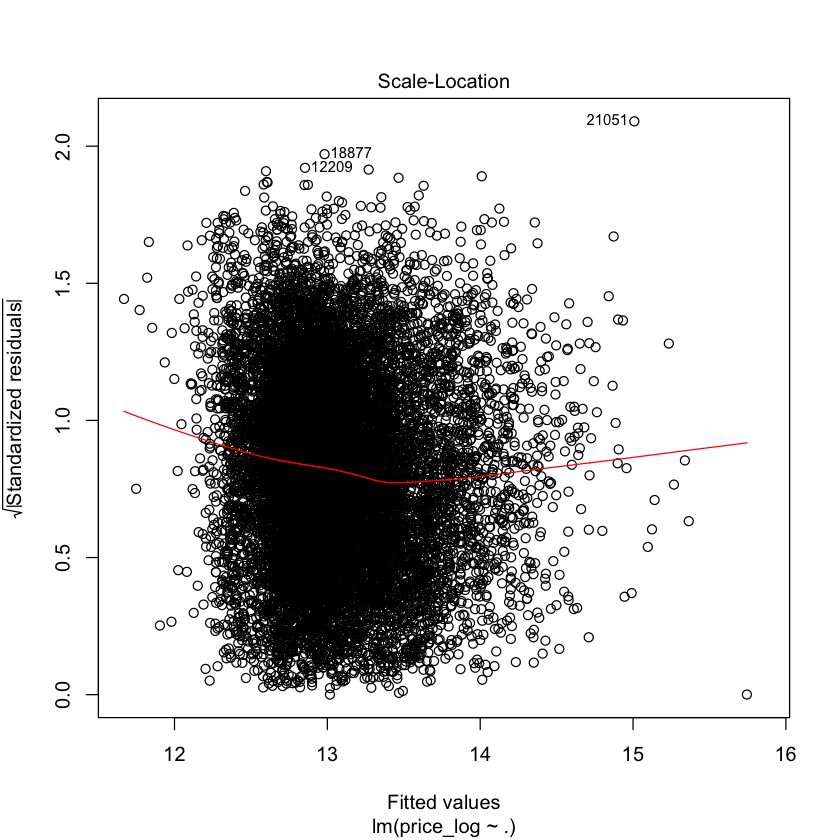

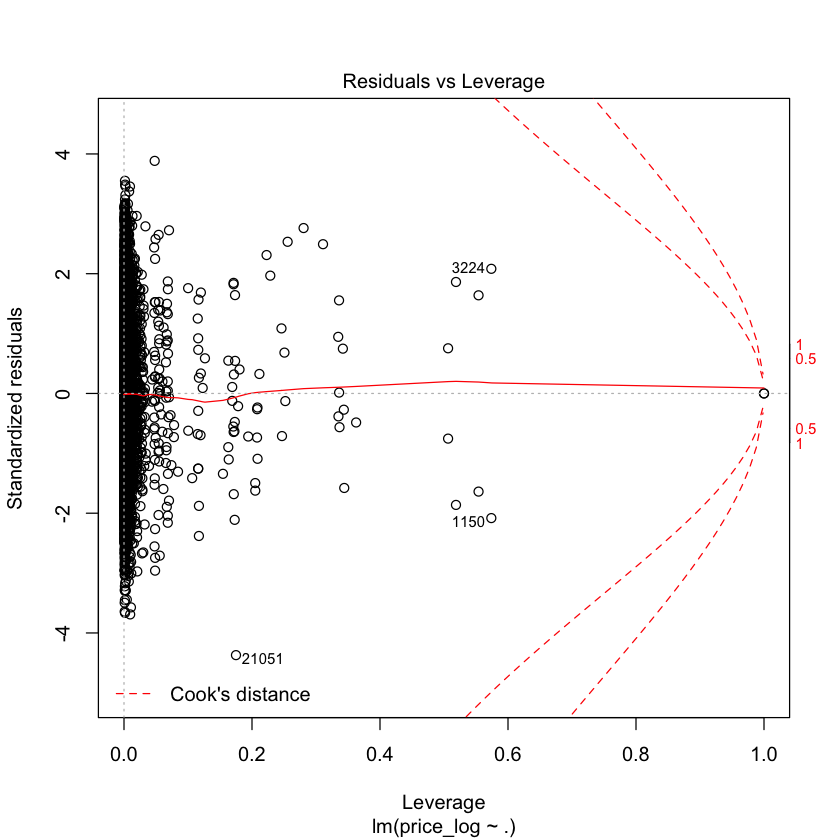

In [66]:
plot(lm5)